In [1]:
"""Sample of non-hierarchical clustering by k-means method.
"""
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score

iris = load_iris()

iris.data.shape

(150, 4)

In [2]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
"""Preparing Iris data
"""
df_iris = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)
display(df_iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# Get the overview.
display(df_iris.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


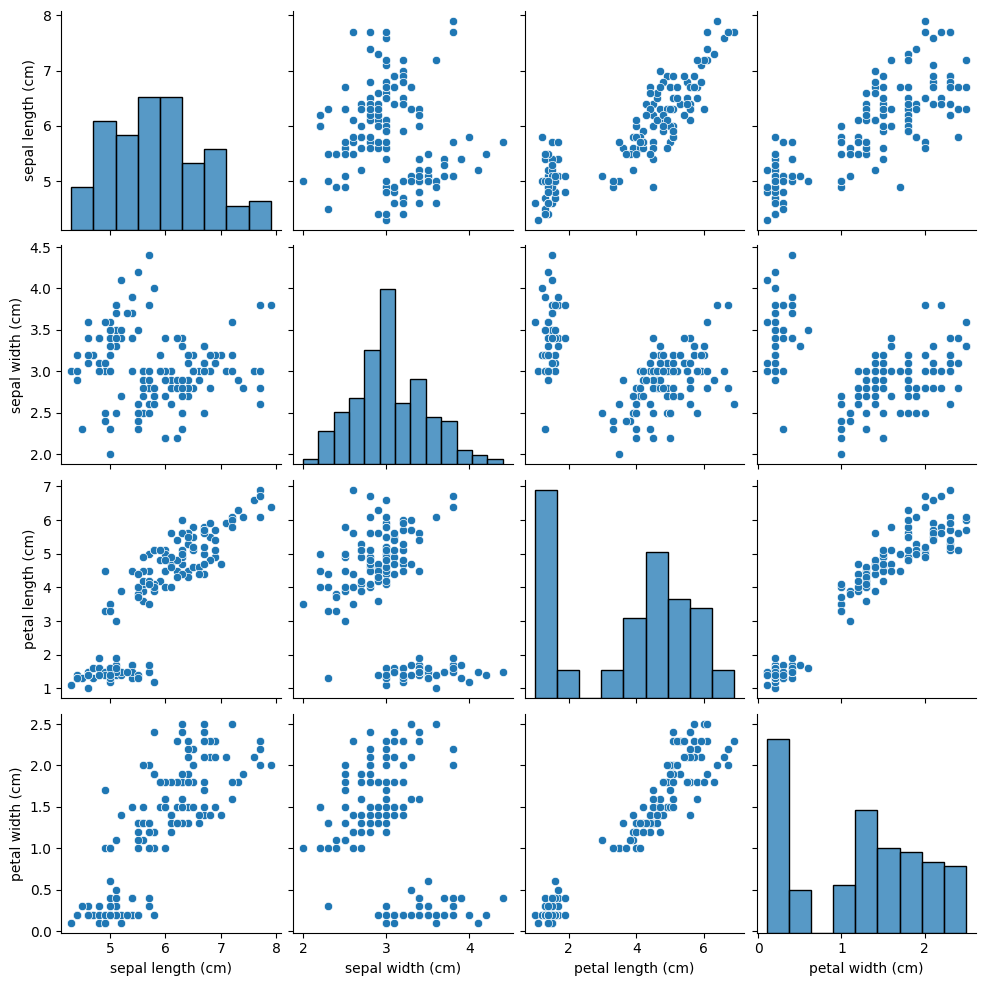

In [6]:
# Pair plot scatter plots for each item.
sns.pairplot(df_iris)

Midway Result Discussion 
- The __correlation trend__ between PETAL and WIDTH can be confirmed.

Data preprocessing is completed here by preparing and understanding the data.

In [7]:
"""Execute clustering.
"""
model = KMeans(
    # cluster length
    n_clusters=3,
    # random seed: for fix the result every time.
    random_state=0,
    # way of initialize the cluster center.(random)
    init='random',
    n_init=10
)

# Clustering model building.
model.fit(df_iris)

KMeans(init='random', n_clusters=3, n_init=10, random_state=0)

In [8]:
cluster = model.predict(df_iris)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

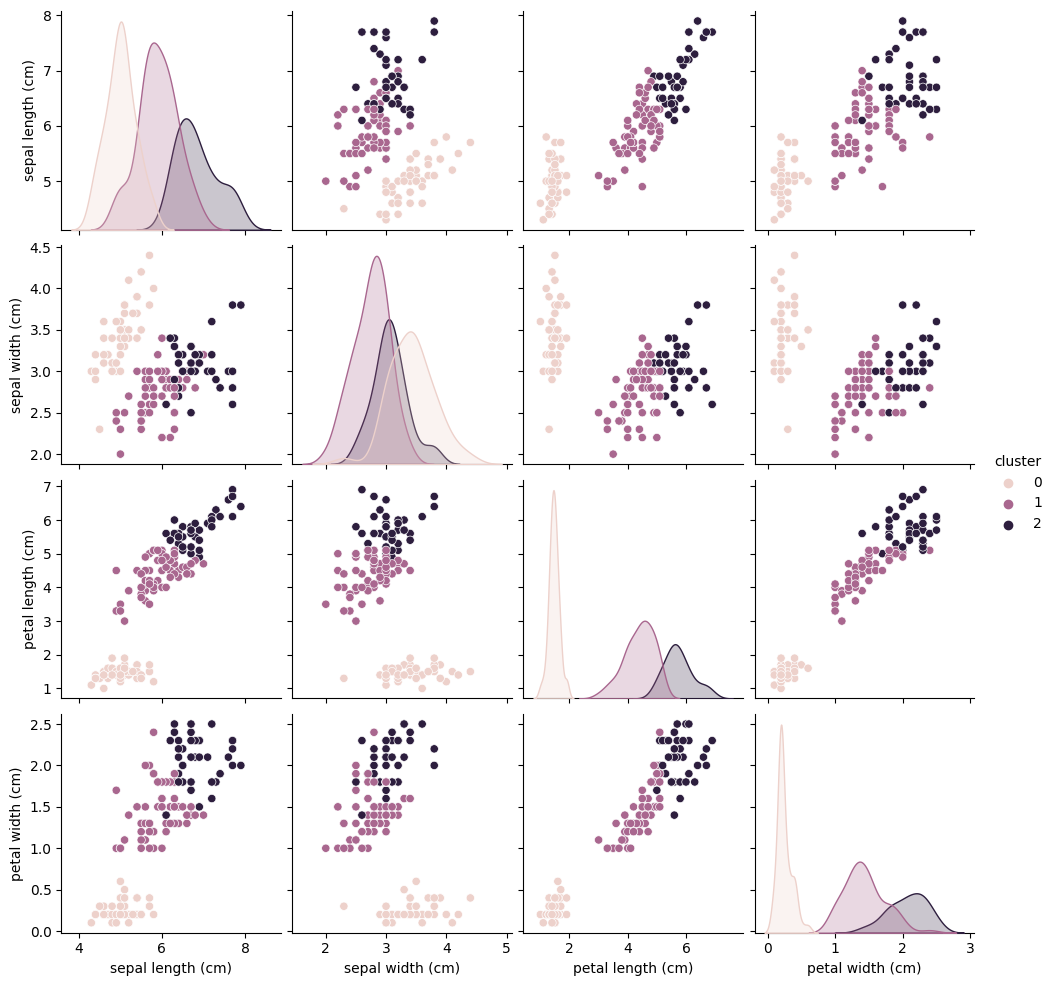

In [9]:
# Get cluster forecast result.
df_iris['cluster'] = cluster
sns.pairplot(df_iris, hue='cluster')

In [10]:
#Obtain the center of the cluster from the created model.
cluster_center = pd.DataFrame(
    # obtain each cluster center
    model.cluster_centers_
)
display(cluster_center)

,0,1,2,3
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


In [11]:
cluster_center.columns = df_iris.columns[:4]
display(cluster_center)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


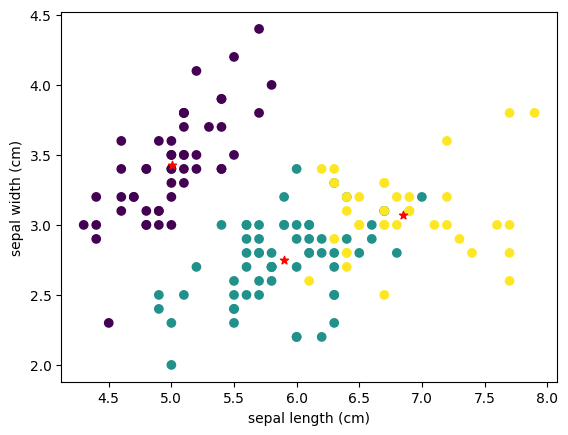

In [12]:
column_name_sepal_length: str = 'sepal length (cm)'
column_name_width_length: str = 'sepal width (cm)'

plt.scatter(
    df_iris[column_name_sepal_length],
    df_iris[column_name_width_length],
    c=df_iris['cluster']
)
plt.xlabel(column_name_sepal_length)
plt.ylabel(column_name_width_length)

# Show each cluseter center
plt.scatter(
    cluster_center[column_name_sepal_length],
    cluster_center[column_name_width_length],
    marker='*',
    color='red'
)

In [13]:
# Mean value of explanatory variables by cluster number.
display(
    df_iris.groupby('cluster').mean().round(3)
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.006,3.428,1.462,0.246
1,5.902,2.748,4.394,1.434
2,6.850,3.074,5.742,2.071


In [14]:
# Interpretation of results.
df_iris['target'] = iris.target
df_iris.loc[df_iris['target'] == 0, 'target'] = 'setosa'
df_iris.loc[df_iris['target'] == 1, 'target'] = 'versicolor'
df_iris.loc[df_iris['target'] == 2, 'target'] = 'virginica'

display(
    df_iris.groupby('target').mean().round(3)
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
target,,,,,
setosa,5.006,3.428,1.462,0.246,0.00
versicolor,5.936,2.770,4.260,1.326,1.04
virginica,6.588,2.974,5.552,2.026,1.72


In [15]:
# Evaluate clustering results.
ari = adjusted_rand_score(
    iris.target,
    df_iris['cluster']
)
# Adusted Rand Index: ARI
f'ARI: {ari:.2f}'

'ARI: 0.73'

In [16]:
# Evaluate acuracy for compare with ARI.
accuracy = accuracy_score(
    iris.target,
    df_iris['cluster']
)
f'Acuracy: {accuracy:.2f}'

'Acuracy: 0.89'

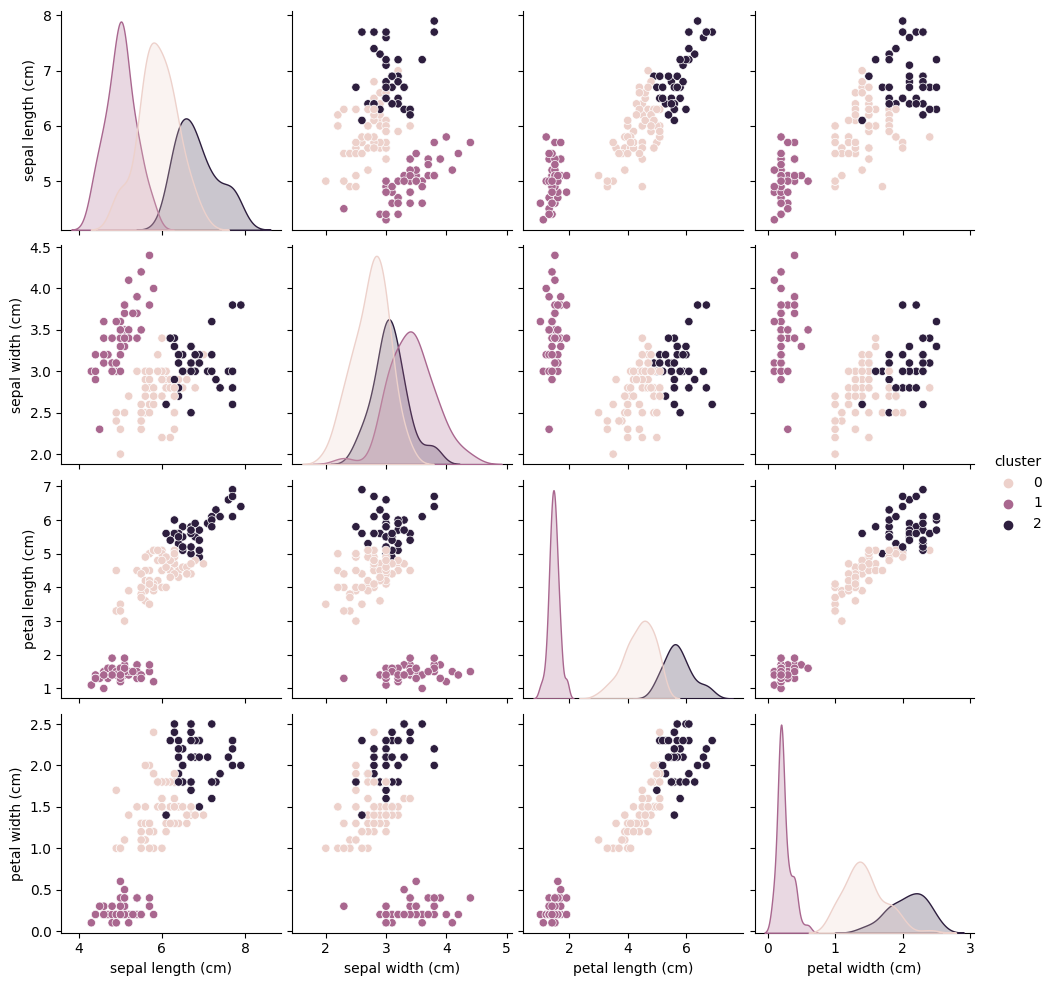

In [17]:
"""Change init cluster center positions from random to k-means++.
"""
df_iris = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

model = KMeans(
    n_clusters=3,
    random_state=0,
    # Note: By default, k-means is selected.
    init='k-means++',
    n_init=10
)
cls_data = df_iris.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)
cls_data['cluster'] = cluster

sns.pairplot(cls_data, hue='cluster')

In [18]:
ari = adjusted_rand_score(
    iris.target,
    cls_data['cluster']
)
f'ARI: {ari:.2f}'

'ARI: 0.73'

- ARI was the same. Accuracy remained the same.

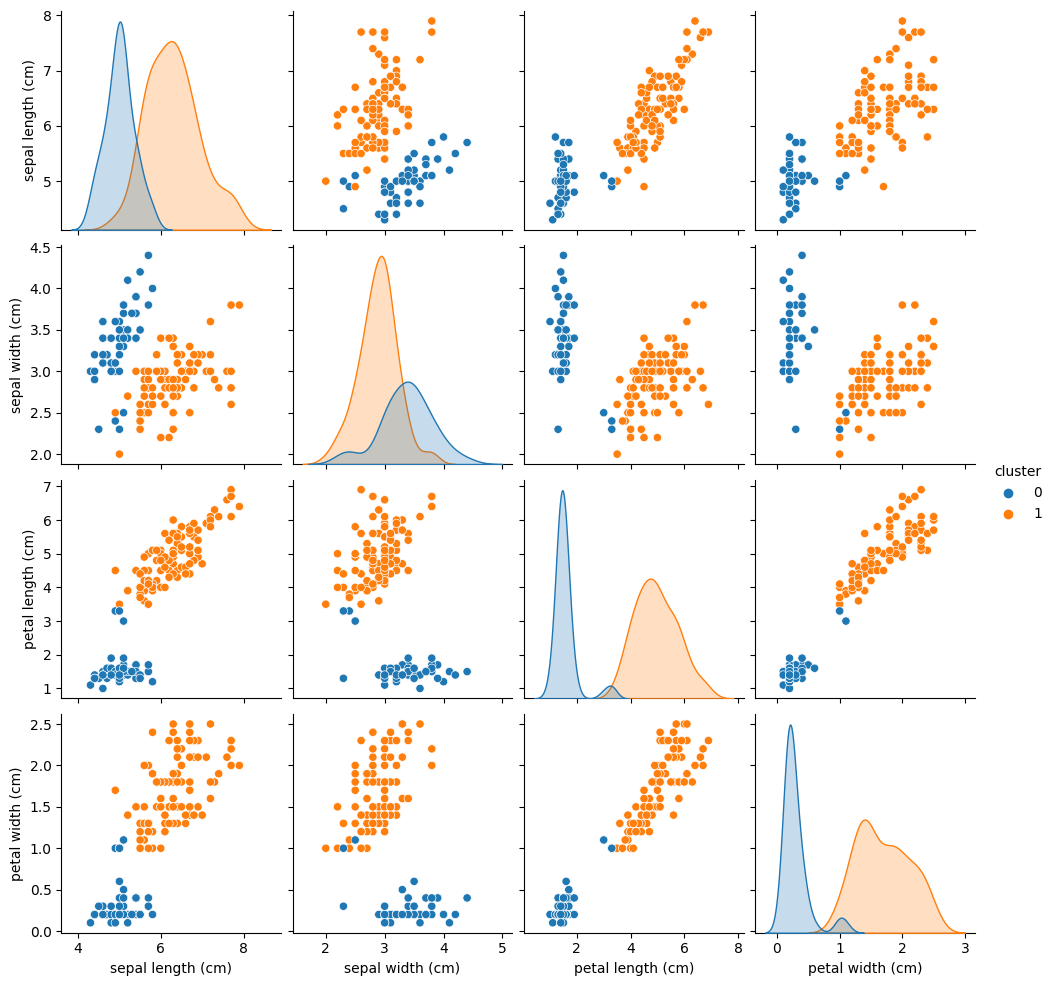

In [19]:
model = KMeans(
    n_clusters=2,
    random_state=0,
    n_init=10
)
cls_data = df_iris.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)
cls_data['cluster'] = cluster

sns.pairplot(cls_data, hue='cluster')

In [20]:
ari = adjusted_rand_score(
    iris.target,
    cls_data['cluster']
)
f'ARI: {ari:.2f}'

'ARI: 0.54'

- ARI was found to be more accurate at 3 than at this 2 setting used.